In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jbcse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jbcse\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jbcse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv('comments.csv', sep=',', header=0)
data.head()

data[data['Is Reply'] == True][1300:1310]

,Comments,Comment ID,Reply Count,Is Reply,Author,AuthorID
2537,👆👆👆\nThanks for watching and leaving a comment...,Ugw2NYiIjCiRnr5mUpx4AaABAg.9aMePefk-wu9aMh9GrQhE0,0,True,Telegram@👉👉mrbeast770,UCwgMHGG8IDcYjjSXtYbE9rQ
2538,Congratulations you have been selected amongst...,Ugw2NYiIjCiRnr5mUpx4AaABAg.9aMePefk-wu9aMefMoxJJh,0,True,TELEGRAM 👉 MRBEAST6688,UCOqxwnL0H8oCTHlBNO9uSGQ
2540,👆👆👆\nThanks for watching and leaving a comment...,UgzjDdzgbDNfewCcgDt4AaABAg.9aMeN7_EuE49aMhIHnRt_M,0,True,Telegram@👉👉mrbeast770,UCwgMHGG8IDcYjjSXtYbE9rQ
2542,Congratulations you have been selected amongst...,UgyTmxKtlsBG3GDOW1x4AaABAg.9aMdm3Zkln99aMeGjHL_3I,0,True,TELEGRAM 👉 MRBEAST6688,UCOqxwnL0H8oCTHlBNO9uSGQ
2544,👆👆👆\nThanks for watching and leaving a comment...,UgyXisXjRZrctz-CbRB4AaABAg.9aMdLQlECGh9aMhacrkx89,0,True,Telegram@👉👉mrbeast770,UCwgMHGG8IDcYjjSXtYbE9rQ
2546,👆👆👆\nThanks for watching and leaving a comment...,Ugwqas8o6Pyp3EsSYI54AaABAg.9aMcvfgRaUA9aMhjlZooGS,0,True,Telegram@👉👉mrbeast770,UCwgMHGG8IDcYjjSXtYbE9rQ
2547,Congratulations you have been selected amongst...,Ugwqas8o6Pyp3EsSYI54AaABAg.9aMcvfgRaUA9aMd4F67uBs,0,True,TELEGRAM 👉 MRBEAST6688,UCOqxwnL0H8oCTHlBNO9uSGQ
2549,Congratulations you have been selected amongst...,UgyvVKPc9cIMrSF0gXh4AaABAg.9aMc_lWesUB9aMcg3T2VBB,0,True,TELEGRAM 👉 MRBEAST6688,UCOqxwnL0H8oCTHlBNO9uSGQ
2551,Inbox me to claim yours,UgwPBW2kYkJFMl9Mled4AaABAg.9aMcL7oR_0s9aMdFBjyt4n,0,True,TELEGRAM 👉 MRBEAST6688,UCOqxwnL0H8oCTHlBNO9uSGQ
2552,Are you the real mr beast,UgwPBW2kYkJFMl9Mled4AaABAg.9aMcL7oR_0s9aMcxRAs7DY,0,True,Yasanda Ransilu,UCMfTLkkdd0yFLVxkI1Dcxjw


In [4]:
scamChannels = ['UCwgMHGG8IDcYjjSXtYbE9rQ', 'UC8Oy99fOvCjHfbvTImDXpkg',
'UCswOElw6g7pEeAA5Mu15p3Q', 'UCIknJ8HTOMLSfIAmtsm84vA', 'UCsXIMkerN0ofYQVIvNWr7Dg', 'UC5iFMKp-Tuf2RX8wTDIA00w',
'UC4BTXtDeOzz85XMShFWY1VA', 'UCIIab0_13sTLxQY66QjpM-g', 'UCZIIrgNdsq0MPdbG6utOLmw', 'UCf3mY9fz0oesuFS4fUnhjsg',
'UCii92DZYgGqYquT71D9cWSQ', 'UCSkoxrUobYERf5FI1F0KDTg', 'UCbdM2ysSVcPxHghp50tiPQw', 'UC1Wi-CaZ_u111EET3es-jzA',
'UCJB7ZvEbo-xRZum_3Zmq9sw', 'UCe5DcGeti6adyFedf49MRuA', 'UCfOYoX3Cwcn0A8t32c3cM5g', 'UCIAYvaVP15Cel4NZ1ib_ADA',
'UC8Oy99fOvCjHfbvTImDXpkg', 'UCgvlSYolCHq5JiiosIvM6lw', 'UCcxxhVKa9wVvHXscwMXC2gQ', 'UCs5NZ-lIbR_rvYDaKvBrVFw',
'UCHCtAgNRSrcBMRqU5SfHplw', 'UC07gLBHCOrcOyE0bw8Lv8Jg', 'UCnOW6JnwbE46hKOPyDYxc_w', 'UCLlW4UJkWDqW9Ht4u8LRztw',
'UCoPBjpeflrKudIDsvDEV0aw', 'UCcoKvgQgWLXosFP5giUeI4g', 'UChYGnlCGDagZT0F8GYhDY2w', 'UCapA77PmpW9dEZQxxJY7TIg',
'UCfdoVOJ9krvIZReKoLWAelA', 'UCU5WWthBfCSYPt-YRNRZYPQ', 'UCDDbjiG_3PHqn4_8BRMr9yA', 'UCVnjpK8HoaeYGQCJUjtiq6g',
'UCkJePyY8lKMvWSF9S-X_hpQ', 'UCcoKvgQgWLXosFP5giUeI4g', 'UCcoKvgQgWLXosFP5giUeI4g', 'UCwRfjTiJGrONLlNHFQ0mQ2A',
'UCJoDuLaZaOmmTLk9IVst6OA', 'UCk4bBXoqPm8j2FjyStas7jQ', 'UC6M_UOk3D8ZG0J2HmuK6J7g', 'UCkJePyY8lKMvWSF9S-X_hpQ',
'UCk4bBXoqPm8j2FjyStas7jQ', 'UCgHM7Mjvat503rAX9jlFf3w', 'UCzywEh2M-ReJTvlPh-jA1-w', 'UC1Wi-CaZ_u111EET3es-jzA',
'UClmn1s3aSJcqsGoQG7ZV5rg', 'UCIAYvaVP15Cel4NZ1ib_ADA', 'UC8Oy99fOvCjHfbvTImDXpkg', 'UCcxxhVKa9wVvHXscwMXC2gQ', 
'UCHCtAgNRSrcBMRqU5SfHplw', 'UC07gLBHCOrcOyE0bw8Lv8Jg', 'UCHCtAgNRSrcBMRqU5SfHplw', 'UCk4bBXoqPm8j2FjyStas7jQ', 
'UClmXrUcfU0A3BWSCU1XouNg', 'UCDhBrg4uKxdc0u5mv2x9GAA', 'UCwgMHGG8IDcYjjSXtYbE9rQ', 'UChYGnlCGDagZT0F8GYhDY2w', 
'UCcoKvgQgWLXosFP5giUeI4g', 'UC4A5Ov8NNZ8K1Lq5cfcESUg', 'UC7qpkq26VEDSe6H3ZwTMWJg', 'UCgvlSYolCHq5JiiosIvM6lw',
'UCk44Jx55IZkD57On49NFtiw', 'UCPDuYbsUJxNexaCBruG-jkw', 'UCOqxwnL0H8oCTHlBNO9uSGQ', 'UCnOW6JnwbE46hKOPyDYxc_w', 
'UCblmGPQJ1_O_gBMmGRiVM9Q', 'UC4IerKEP2BDFd2VVXLaeU7w', 'UCVnjpK8HoaeYGQCJUjtiq6g', 'UChoTld7IoAinX5E7nYTZJVg',
'UCwgMHGG8IDcYjjSXtYbE9rQ', 'UC4IerKEP2BDFd2VVXLaeU7w', 'UCYbUqEvxVhVh71wBbrgvyGA', 'UCEmzN-PVaElRDmdlBFbMW1A', 
'UCNBOZg8v0cFe2RYvSgJ_K3A', 'UCpTKksadLBwHiFOdtxVq5Sg', 'UCkGvXvq42A152M8S5xOMbBw', 'UC4kPR2QLYHmURMMr5ERPAcA', 
'UCJ4a59zmaTKVThYBU-ZZdFA', 'UCV_Qh1S9gCCXm2XBQRy0v8Q', 'UCsXIMkerN0ofYQVIvNWr7Dg', 'UCgP6tTK8LrlhK7LMhExs6eQ', 
'UCRqHZqWr81nXW0Qr2MVcD-g', 'UCpTKksadLBwHiFOdtxVq5Sg', 'UC1Wi-CaZ_u111EET3es-jzA', 'UCfH5_gBNYMszkN-6P1SAC1Q', 
'UCfH5_gBNYMszkN-6P1SAC1Q', 'UC8Oy99fOvCjHfbvTImDXpkg', 'UCYGbbdOfUAtBOFoiifA4cpw', 'UCFSHMdKANs7Ee_xAfvfX7ug', 
'UChYuxekYJM1HXY6ThthPR8A', 'UCXLbuE7gWN6CVyliQHKP62w', 'UC1Wi-CaZ_u111EET3es-jzA', 'UCYGbbdOfUAtBOFoiifA4cpw',
'UCpd3kplR9EdsvjbCAtp1JPw', 'UCOLzBAcpeCiue5PnlPSvczQ', 'UCpd3kplR9EdsvjbCAtp1JPw', 'UCMhUkjPmAi9xrbskMrdNPWA',
'UCLlW4UJkWDqW9Ht4u8LRztw', 'UC0anupzl59WSN3XiwtcskaA', 'UCOLzBAcpeCiue5PnlPSvczQ', 'UClLJBDGFBNEvfuqO7mnISDA',
'UCOLzBAcpeCiue5PnlPSvczQ', 'UCnOW6JnwbE46hKOPyDYxc_w', 'UCINx9NBUBTrtejzu6j_Msrw', 'UCnOW6JnwbE46hKOPyDYxc_w',
'UCINx9NBUBTrtejzu6j_Msrw'
]

def isScam(id):

    if  id in scamChannels:
        return 1
    else:
        return 0


data['Is Scam'] = data['AuthorID'].apply(lambda x: isScam(x))

train = data[0:30000].copy()[['Comments', 'Is Reply', 'Author', 'Is Scam']]
test = data[30001:35001].copy()[['Comments', 'Is Reply', 'Author', 'AuthorID']]

In [5]:
x = train['Is Scam'].value_counts()
x

0    22827
1     7173
Name: Is Scam, dtype: int64

In [6]:
train['Word Count'] = train['Comments'].apply(lambda x: len(str(x).split()))
print(train[train['Is Scam']==1]['Word Count'].mean())
print(train[train['Is Scam']==0]['Word Count'].mean())

10.352014498815
8.597976080956762


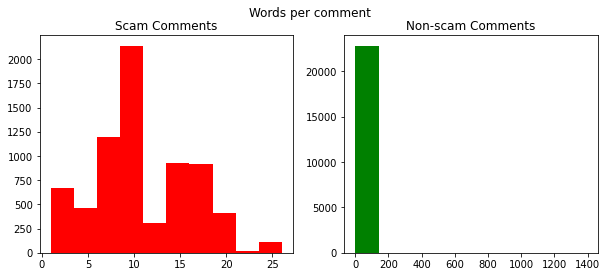

In [7]:
# PLOTTING WORD-COUNT
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=train[train['Is Scam']==1]['Word Count']
ax1.hist(train_words,color='red')
ax1.set_title('Scam Comments')
train_words=train[train['Is Scam']==0]['Word Count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-scam Comments')
fig.suptitle('Words per comment')
plt.show()

In [24]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = str(text).lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))


train['Clean Comment'] = train['Comments'].apply(lambda x: finalpreprocess(x))
train['Clean Author'] = train['Author'].apply(lambda x: finalpreprocess(x))

In [43]:
train.head()

,Comments,Is Reply,Author,Is Scam,Word Count,Clean Comment,Clean Author,Clean text tokens,Clean Author tokens
0,I hope you guys like the new video concept :),False,MrBeast,0,10,hope guy like new video concept,mrbeast,"[hope, guy, like, new, video, concept]",[mrbeast]
1,your mom,True,ry kb,0,2,mom,ry kb,[mom],"[ry, kb]"
2,Y r best,True,Debashis Bhattacharjee,0,3,r best,debashis bhattacharjee,"[r, best]","[debashis, bhattacharjee]"
3,Last,True,Niloy Zaman,0,1,last,niloy zaman,[last],"[niloy, zaman]"
4,I love you,True,RedTune605,0,3,love,redtune,[love],[redtune]


In [44]:
train['Clean text tokens']=[nltk.word_tokenize(i) for i in train['Clean Comment']]
train['Clean Author tokens']=[nltk.word_tokenize(i) for i in train['Clean Author']]

X_train, X_test, y_train, y_test = train_test_split(train['Clean Comment'], train['Is Scam'], test_size=0.4, shuffle=True)
X_train_author, X_test_author, y_train_author, y_test_author = train_test_split(train['Clean Author'], train['Is Scam'], test_size=0.4, shuffle=True)

In [47]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

author_tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf_author = author_tfidf_vectorizer.fit_transform(X_train_author) 
X_test_vectors_tfidf_author = author_tfidf_vectorizer.transform(X_test_author)

In [52]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
joblib.dump(lr_tfidf, 'CommentTextModel')


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      9140
           1       0.74      0.82      0.78      2860

    accuracy                           0.89     12000
   macro avg       0.84      0.87      0.85     12000
weighted avg       0.89      0.89      0.89     12000

Confusion Matrix: [[8306  834]
 [ 511 2349]]
AUC: 0.9458196699361907


['CommentTextModel']

In [53]:

#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf_author=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf_author.fit(X_train_vectors_tfidf_author, y_train_author)  #model

y_predict = lr_tfidf_author.predict(X_test_vectors_tfidf_author)
y_prob = lr_tfidf_author.predict_proba(X_test_vectors_tfidf_author)[:,1]

print(classification_report(y_test_author,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test_author, y_predict))

fpr, tpr, thresholds = roc_curve(y_test_author, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
joblib.dump(lr_tfidf_author, 'AuthorNameModel')

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      9101
           1       0.79      0.98      0.88      2899

    accuracy                           0.93     12000
   macro avg       0.89      0.95      0.91     12000
weighted avg       0.94      0.93      0.93     12000

Confusion Matrix: [[8341  760]
 [  52 2847]]
AUC: 0.9778139797077745


['AuthorNameModel']

In [56]:
#Pre-processing the new dataset
test['Clean Comments'] = test['Comments'].apply(lambda x: finalpreprocess(x)) #preprocess the data
test['Clean Author'] = test['Author'].apply(lambda x: finalpreprocess(x))

X_test = test['Clean Comments']
X_test_author = test['Clean Author']

#converting words to numerical data using tf-idf
X_vector=tfidf_vectorizer.transform(X_test)
X_vector_author = author_tfidf_vectorizer.transform(X_test_author)

#use the best model to predict 'target' value for the new dataset 
lr_tfidf = joblib.load('CommentTextModel')
lr_tfidf_author = joblib.load('AuthorNameModel')

y_predict = lr_tfidf.predict(X_vector)      
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]

y_predict_author = lr_tfidf_author.predict(X_vector_author)
y_prob_author = lr_tfidf_author.predict_proba(X_vector_author)[:,1]

test['predict_prob']= y_prob
test['Is Scam']= y_predict
test['author_predict_prob'] = y_prob_author
test['Is Scam byAuthor'] = y_predict_author
final=test[['Clean Comments', 'Clean Author', 'predict_prob', 'author_predict_prob', 'Is Scam', 'Is Scam byAuthor', 'AuthorID']].reset_index(drop=True)

In [57]:
final[final['Is Scam'] == True]

,Clean Comments,Clean Author,predict_prob,author_predict_prob,Is Scam,Is Scam byAuthor,AuthorID
10,thanks watch comment send direct massage right...,①③①⑦③②④⑤①⑦②whatsapp,0.820543,0.711434,1,1,UCH3p2Phf0cKQ0tSraE9Gl6A
12,thanks watch comment send direct massage right...,①③①⑦③②④⑤①⑦②whatsapp,0.820543,0.711434,1,1,UCH3p2Phf0cKQ0tSraE9Gl6A
14,thanks watch comment send direct massage right...,①③①⑦③②④⑤①⑦②whatsapp,0.820543,0.711434,1,1,UCH3p2Phf0cKQ0tSraE9Gl6A
18,thanks watch comment send direct massage right...,①③①⑦③②④⑤①⑦②whatsapp,0.820543,0.711434,1,1,UCH3p2Phf0cKQ0tSraE9Gl6A
25,thanks watch congratulation select among short...,message telegram zhc,0.746905,0.001805,1,0,UCPuAuTprV61plFTD7a6Xb2w
...,...,...,...,...,...,...,...
4948,thanks watch select among lucky winner inbox,whatsapp ②⓪⑨⑦⑧③⑨⑧①③,0.823172,0.990235,1,1,UCZIIrgNdsq0MPdbG6utOLmw
4952,thanks watch select among lucky winner inbox,whatsapp ②⓪⑨⑦⑧③⑨⑧①③,0.823172,0.990235,1,1,UCZIIrgNdsq0MPdbG6utOLmw
4954,thanks watch select among lucky winner inbox,whatsapp ②⓪⑨⑦⑧③⑨⑧①③,0.823172,0.990235,1,1,UCZIIrgNdsq0MPdbG6utOLmw
4959,thanks watch select among lucky winner inbox,whatsapp ②⓪⑨⑦⑧③⑨⑧①③,0.823172,0.990235,1,1,UCZIIrgNdsq0MPdbG6utOLmw
